<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-01 23:57:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  35.7MB/s    in 1.0s    

2024-03-01 23:57:37 (35.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [18]:
QUERY = """
SELECT LanguageWorkedWith,COUNT(*) as count
FROM master
group by LanguageWorkedWith

"""
pd.read_sql_query(QUERY,conn)

ProgrammingError: Cannot operate on a closed database.

## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


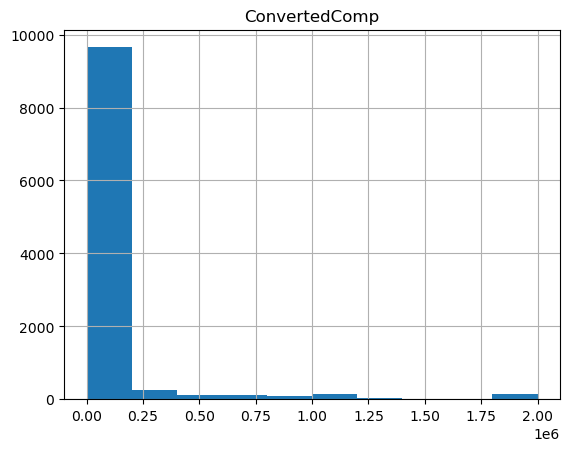

In [8]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

table_name = 'ConvertedComp'

QUERY = """
SELECT {} as ConvertedComp
FROM master
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
df.hist(bins=10)
plt.show()

### Box Plots


Plot a box plot of `Age.`


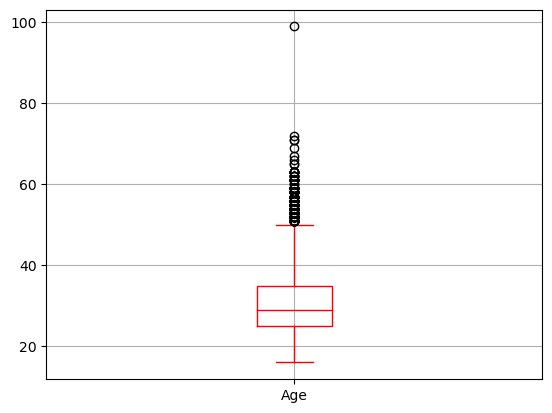

In [9]:
# your code goes here
table_name = 'Age'

QUERY = """
SELECT {} as Age
FROM master
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
df.boxplot(color='red')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


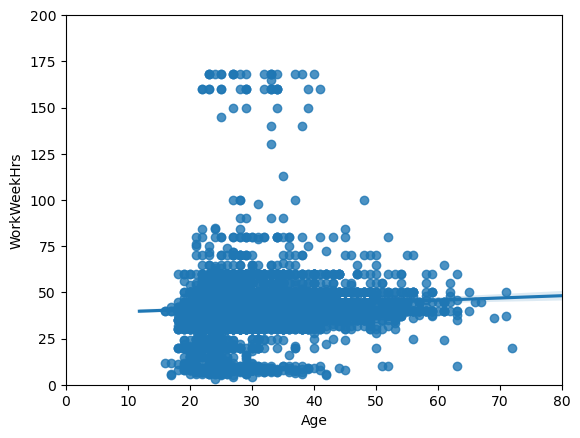

In [10]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Age as potential predictor variable of WorkWeekHrs
sns.regplot(x="Age", y="WorkWeekHrs", data=df)
plt.ylim(0,200)
plt.xlim(0,80)

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Matplotlib version:  3.5.3


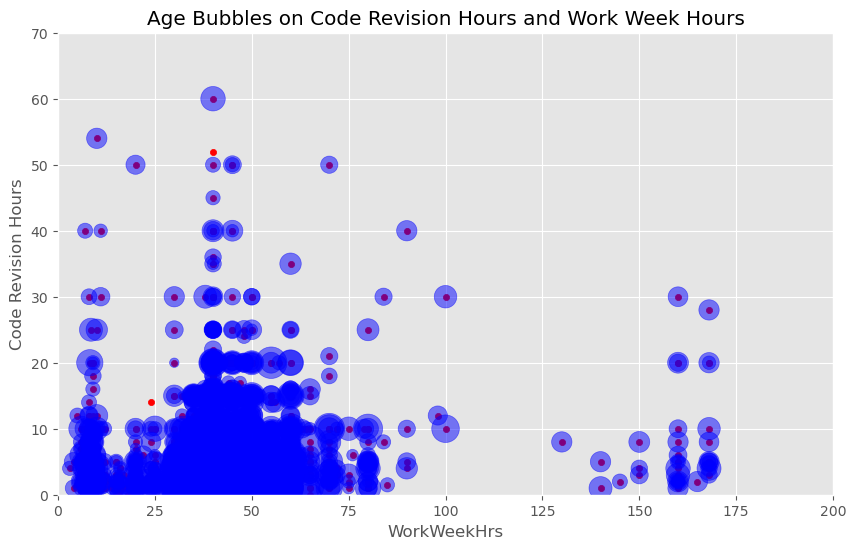

In [11]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

ax = df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 6), color='Red')

plt.title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.xlim(0,200)
plt.ylim(0,70)



# normalize Age data
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Age
ax = df.plot(kind='scatter', 
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=norm_age * 1000 + 10,
                    ax = ax
                   )

ax.set_ylabel('Code Revision Hours')
ax.set_title('Age Bubbles on Code Revision Hours and Work Week Hours')

plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


   DatabaseDesireNextYear  Count    percent
11             PostgreSQL   4328  24.809401
7                 MongoDB   3649  20.917168
12                  Redis   3331  19.094296
8                   MySQL   3281  18.807681
3           Elasticsearch   2856  16.371453


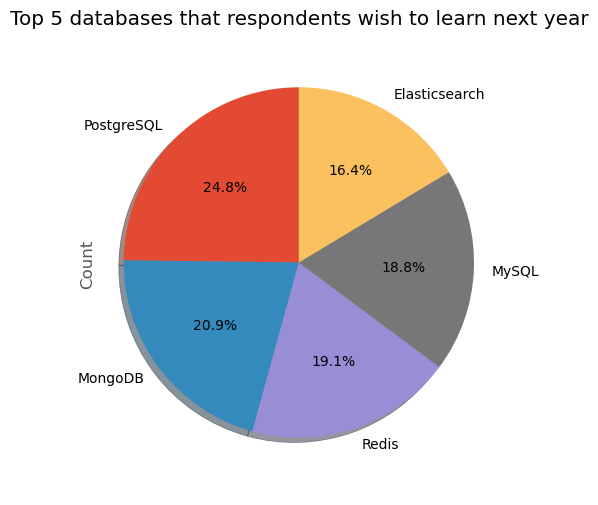

In [12]:
# your code goes here
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)

QUERY = """
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

df = df.head(5)
total = df.sum(0)[1]

df['percent'] = 100 * df['Count']/total

df.set_index('DatabaseDesireNextYear')
print(df)


# autopct create %, start angle represent starting point
df['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            labels=df['DatabaseDesireNextYear'])

plt.title('Top 5 databases that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


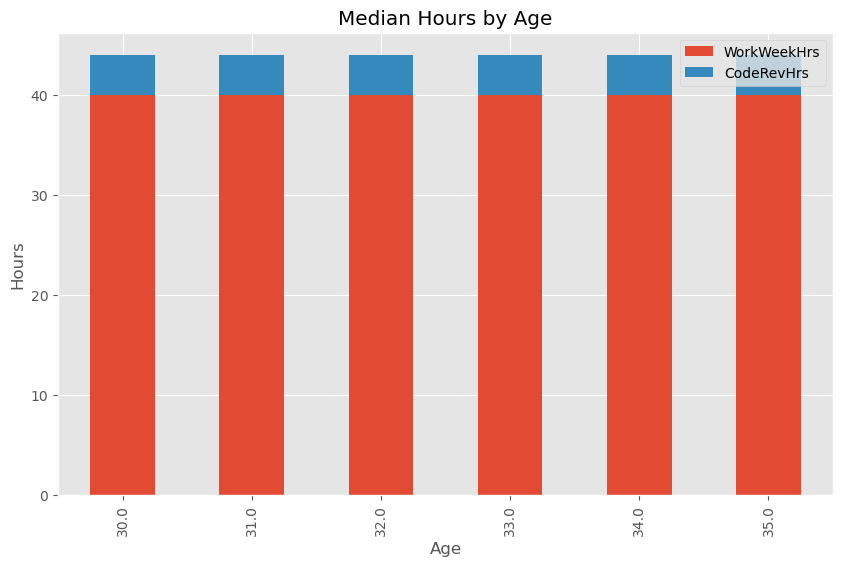

In [13]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df_age = pd.read_sql_query(QUERY,conn) 


# group respondents by age and apply median() function 
df_age = df_age.groupby('Age', axis=0).median()


df_age[30:35].plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Hours') # add y-label to the plot
plt.title('Median Hours by Age') # add title to the plot

plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


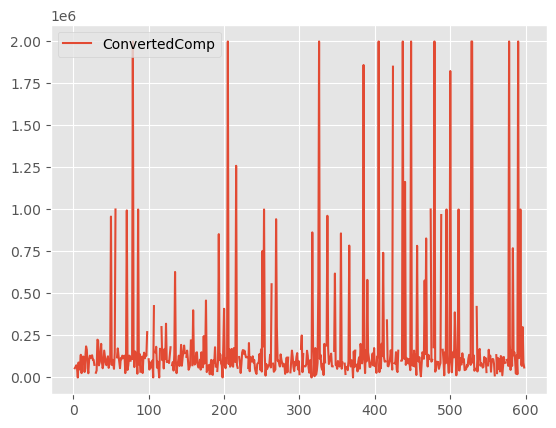

In [14]:
# your code goes here
QUERY = """
SELECT ConvertedComp FROM master where Age BETWEEN 45 and 60
"""

df4 = pd.read_sql_query(QUERY, conn)
df4.head()

df4.plot(kind='line')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


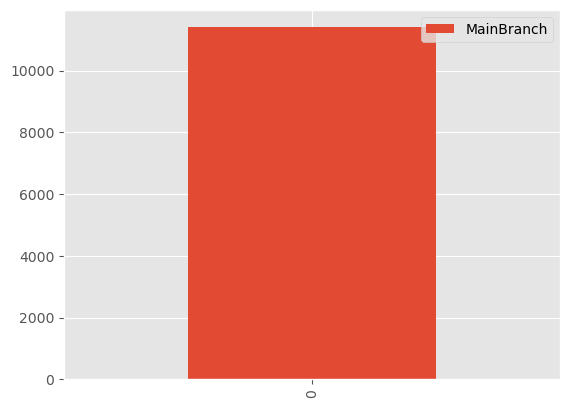

In [15]:
# your code goes here
QUERY = """
SELECT MainBranch,COUNT(*)as MainBranch FROM master"""

df5 = pd.read_sql_query(QUERY, conn)
df5.head()

df5.plot(kind='bar')
plt.show()


Close the database connection.


In [16]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
